<a href="https://colab.research.google.com/github/Pallavi-Bhaskar/Anime-Recommendations/blob/main/HousingPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("Chennai houseing sale.csv")
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
#data cleaning
data_shape = data.shape
print(f"The dataframe has {data_shape[0]} records and {data_shape[1]} features")

The dataframe has 7109 records and 22 features


In [6]:
#checking for missing values
data.isna().any()

PRT_ID           False
AREA             False
INT_SQFT         False
DATE_SALE        False
DIST_MAINROAD    False
N_BEDROOM         True
N_BATHROOM        True
N_ROOM           False
SALE_COND        False
PARK_FACIL       False
DATE_BUILD       False
BUILDTYPE        False
UTILITY_AVAIL    False
STREET           False
MZZONE           False
QS_ROOMS         False
QS_BATHROOM      False
QS_BEDROOM       False
QS_OVERALL        True
REG_FEE          False
COMMIS           False
SALES_PRICE      False
dtype: bool

In [7]:
data.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
data.dropna(inplace=True)
data.isna().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7056 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7056 non-null   object 
 1   AREA           7056 non-null   object 
 2   INT_SQFT       7056 non-null   int64  
 3   DATE_SALE      7056 non-null   object 
 4   DIST_MAINROAD  7056 non-null   int64  
 5   N_BEDROOM      7056 non-null   float64
 6   N_BATHROOM     7056 non-null   float64
 7   N_ROOM         7056 non-null   int64  
 8   SALE_COND      7056 non-null   object 
 9   PARK_FACIL     7056 non-null   object 
 10  DATE_BUILD     7056 non-null   object 
 11  BUILDTYPE      7056 non-null   object 
 12  UTILITY_AVAIL  7056 non-null   object 
 13  STREET         7056 non-null   object 
 14  MZZONE         7056 non-null   object 
 15  QS_ROOMS       7056 non-null   float64
 16  QS_BATHROOM    7056 non-null   float64
 17  QS_BEDROOM     7056 non-null   float64
 18  QS_OVERA

In [10]:
data.nunique()

PRT_ID           7056
AREA               17
INT_SQFT         1698
DATE_SALE        2794
DIST_MAINROAD     201
N_BEDROOM           4
N_BATHROOM          2
N_ROOM              5
SALE_COND           9
PARK_FACIL          3
DATE_BUILD       5773
BUILDTYPE           5
UTILITY_AVAIL       5
STREET              5
MZZONE              6
QS_ROOMS           31
QS_BATHROOM        31
QS_BEDROOM         31
QS_OVERALL        479
REG_FEE          6986
COMMIS           6960
SALES_PRICE      7005
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


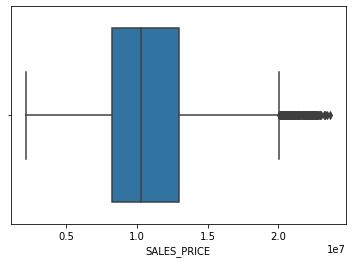

In [11]:
#checking outliers
sns.boxplot(data['SALES_PRICE'])

In [12]:
data.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [16]:
data['Total_Price'] = data['REG_FEE'] + data['COMMIS'] + data['SALES_PRICE']
data['DATE_SALE'] = pd.to_datetime(data['DATE_SALE'],format='%d-%m-%Y')
data['DATE_BUILD'] = pd.to_datetime(data['DATE_BUILD'],format='%d-%m-%Y')
data['AGE'] = pd.DatetimeIndex(data['DATE_SALE']).year - pd.DatetimeIndex(data['DATE_BUILD']).year
data['QS_BATHROOM'] = data['QS_BATHROOM'].astype(int)
data['QS_BEDROOM'] = data['QS_BEDROOM'].astype(int)

In [17]:
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'chrompet',
       'KK Nagar', 'T Nagar', 'Chormpet'], dtype=object)

In [14]:
data['AREA'].replace(['Ann Nagar','Ana Nagar'],'Anna Nagar',inplace=True)
data['AREA'].replace(['Karapakam'],'Karapakkam',inplace=True)
data['AREA'].replace('Velchery','Velachery',inplace=True)
data['AREA'].replace(['Adyar','Adyr'],'Adyar',inplace=True)
data['AREA'].replace(['Chrompet','Chrompt','Chrmpet'],'chrompet',inplace=True)
data['AREA'].replace(['KKNagar'],'KK Nagar',inplace=True)
data['AREA'].replace(['TNagar'],'T Nagar',inplace=True)
data['PARK_FACIL'].replace('Noo','No',inplace=True)
data['UTILITY_AVAIL'].replace('AllPub','All Pub',inplace=True)
data['UTILITY_AVAIL'].replace('NoSewr','NoSeWa',inplace=True)
data['BUILDTYPE'].replace('Comercial','Commercial',inplace=True)
data['BUILDTYPE'].replace('Other','Others',inplace=True)
data['SALE_COND'] = data['SALE_COND'].replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})

In [15]:
data['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [18]:
data['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [19]:
data['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'chrompet',
       'KK Nagar', 'T Nagar', 'Chormpet'], dtype=object)

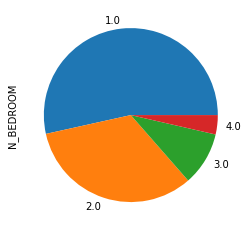

In [20]:
data['N_BEDROOM'].value_counts().plot(kind='pie')

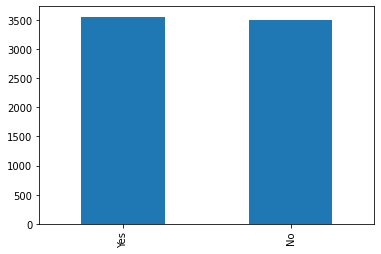

In [21]:
data['PARK_FACIL'].value_counts().plot(kind='bar')

In [22]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Total_Price,AGE
count,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7056.000000,7.056000e+03,7.056000e+03,7056.000000
mean,1381.316752,99.569161,1.636621,1.213152,3.686650,3.517177,3.068452,3.055981,3.503389,376791.852608,140994.273384,1.088801e+07,1.140579e+07,24.273526
std,457.860850,57.403870,0.803633,0.409563,1.020011,0.892141,0.875684,0.871543,0.527313,143109.581793,78774.465963,3.769081e+06,3.945567e+06,12.331565
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06,2.253935e+06,3.000000
25%,991.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.000000,2.000000,3.130000,272117.500000,84212.750000,8.266790e+06,8.639780e+06,14.000000
50%,1369.500000,99.000000,1.000000,1.000000,4.000000,3.500000,3.000000,3.000000,3.500000,349444.500000,127640.500000,1.031922e+07,1.080447e+07,23.000000
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.000000,4.000000,3.890000,451030.500000,184449.000000,1.298148e+07,1.360245e+07,34.000000
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07,2.496904e+07,55.000000


In [23]:
data['Total_Price'].describe()

count    7.056000e+03
mean     1.140579e+07
std      3.945567e+06
min      2.253935e+06
25%      8.639780e+06
50%      1.080447e+07
75%      1.360245e+07
max      2.496904e+07
Name: Total_Price, dtype: float64

The median Total_price is  10804468.0 Lets see how it varies with INT_SQFT


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


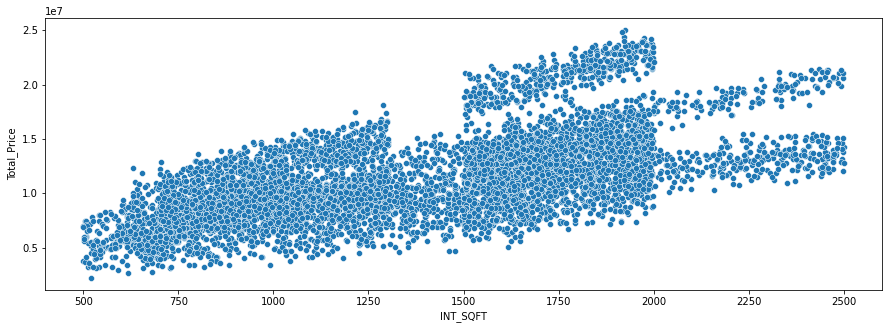

In [24]:
print("The median Total_price is ",data['Total_Price'].median(),"Lets see how it varies with INT_SQFT")
plt.figure(figsize=(15,5))
sns.scatterplot(data['INT_SQFT'],data['Total_Price'])

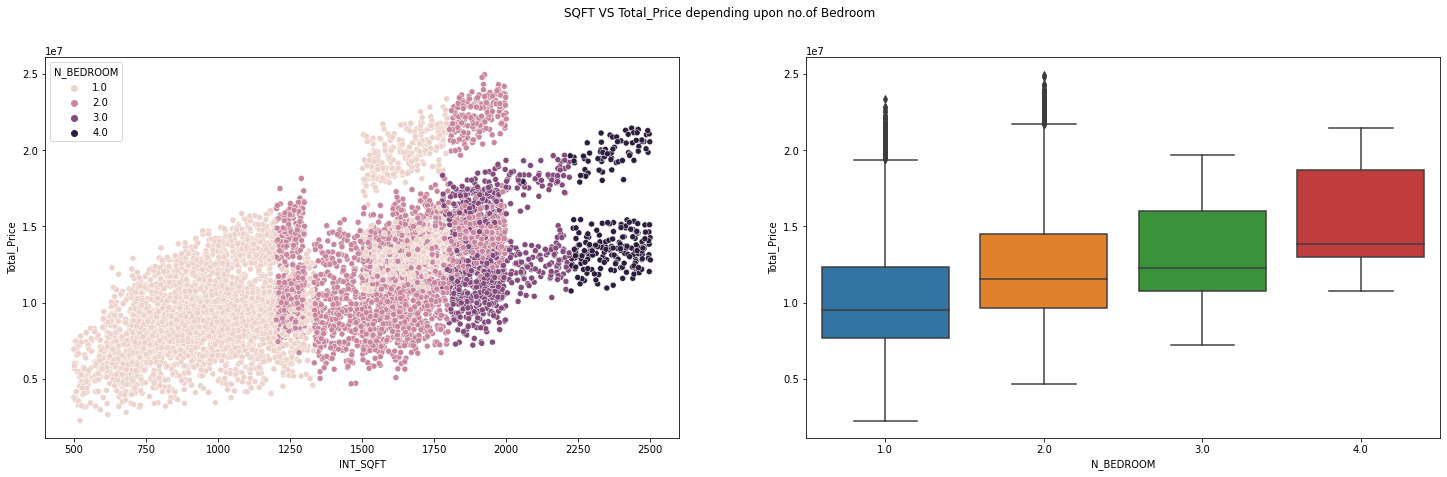

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("SQFT VS Total_Price depending upon no.of Bedroom")

sns.scatterplot(x=data['INT_SQFT'],y=data['Total_Price'],data = data,hue='N_BEDROOM',ax=ax1)
sns.boxplot(x=data['N_BEDROOM'],y=data['Total_Price'])

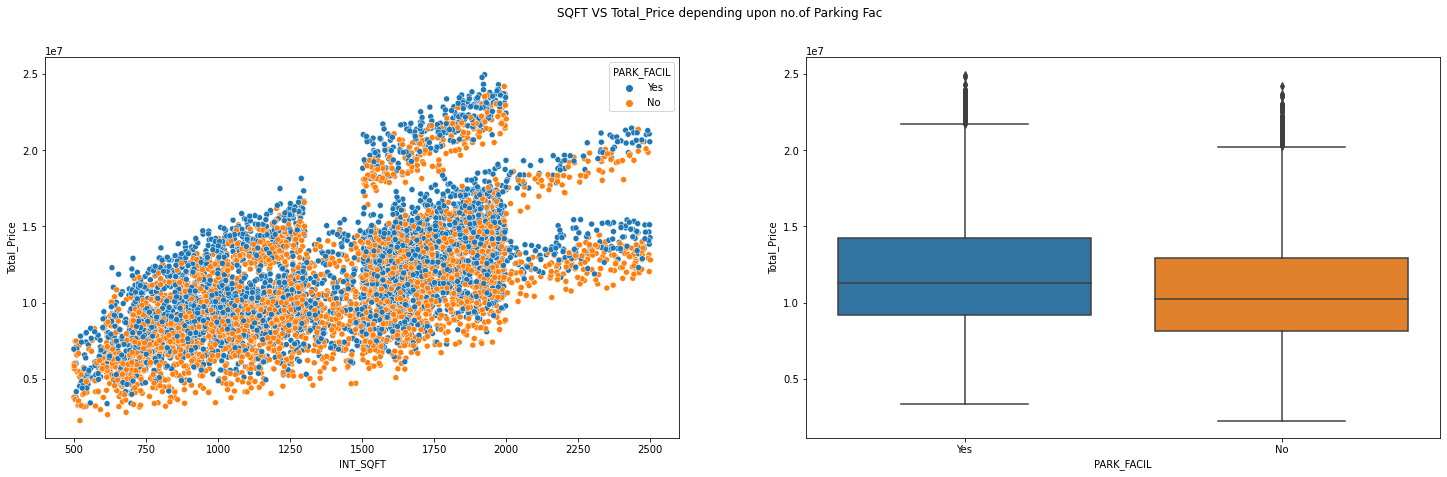

In [26]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(25,7))
fig.suptitle("SQFT VS Total_Price depending upon no.of Parking Fac")

sns.scatterplot(x=data['INT_SQFT'],y=data['Total_Price'],data = data,hue='PARK_FACIL',ax=ax1)
sns.boxplot(x=data['PARK_FACIL'],y=data['Total_Price'])

#Data preprocessing

In [27]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

data['AREA'] = encoder.fit_transform(data['AREA'])
data['SALE_COND'] = encoder.fit_transform(data['SALE_COND'])
data['PARK_FACIL'] = encoder.fit_transform(data['PARK_FACIL'])
data['SALE_COND'] = encoder.fit_transform(data['SALE_COND'])
data['UTILITY_AVAIL'] = encoder.fit_transform(data['UTILITY_AVAIL'])
data['STREET'] = encoder.fit_transform(data['STREET'])
data['MZZONE'] = encoder.fit_transform(data['MZZONE'])
data['BUILDTYPE'] = encoder.fit_transform(data['BUILDTYPE'])

#Feature Selection

In [29]:
y = data['Total_Price']
x = data.drop(['Total_Price','QS_OVERALL','QS_BEDROOM','QS_BATHROOM','DATE_BUILD','DATE_SALE','PRT_ID'],axis=1)
x

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,REG_FEE,COMMIS,SALES_PRICE,AGE
0,4,1004,131,1.0,1.0,3,1,1,0,0,4,0,4.0,380000,144400,7600000,44
1,1,1986,26,2.0,1.0,5,1,0,0,0,0,3,4.9,760122,304049,21717770,11
2,0,909,70,1.0,1.0,3,1,1,0,1,0,4,4.1,421094,92114,13159200,20
3,6,1855,14,3.0,2.0,5,4,0,2,3,4,2,4.7,356321,77042,9630290,22
4,4,1226,84,1.0,1.0,3,1,1,2,0,0,1,3.0,237000,74063,7406250,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598,51,1.0,1.0,2,3,0,2,1,1,5,3.0,208767,107060,5353000,49
7105,6,1897,52,3.0,2.0,5,4,1,2,2,1,3,3.6,346191,205551,10818480,9
7106,6,1614,152,2.0,1.0,4,5,0,1,2,0,2,4.3,317354,167028,8351410,28
7107,4,787,40,1.0,1.0,2,7,1,0,1,4,4,4.6,425350,119098,8507000,32


#Splitting of Training and Test data

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=0)

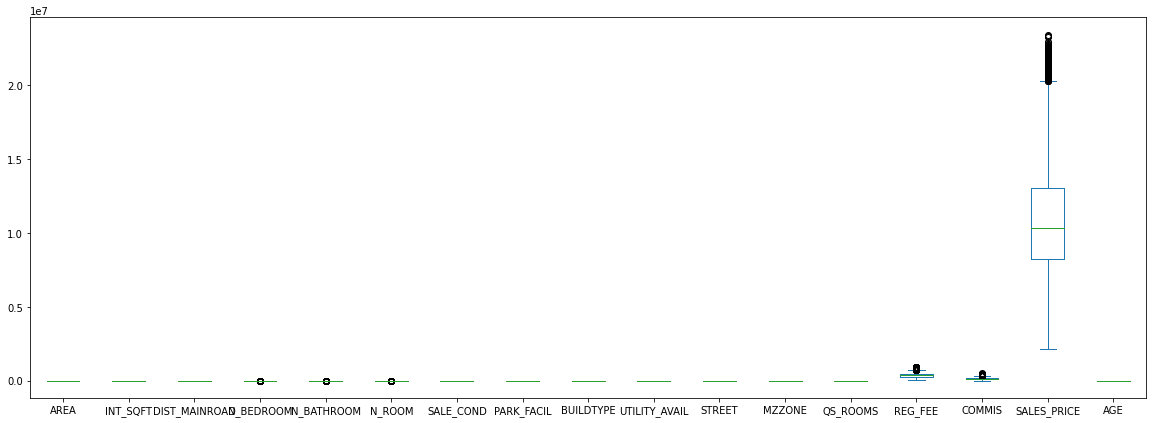

In [32]:
#scaling
pd.DataFrame(x_train, columns=x_train.columns).plot(kind='box',figsize=(20,7))
plt.show()

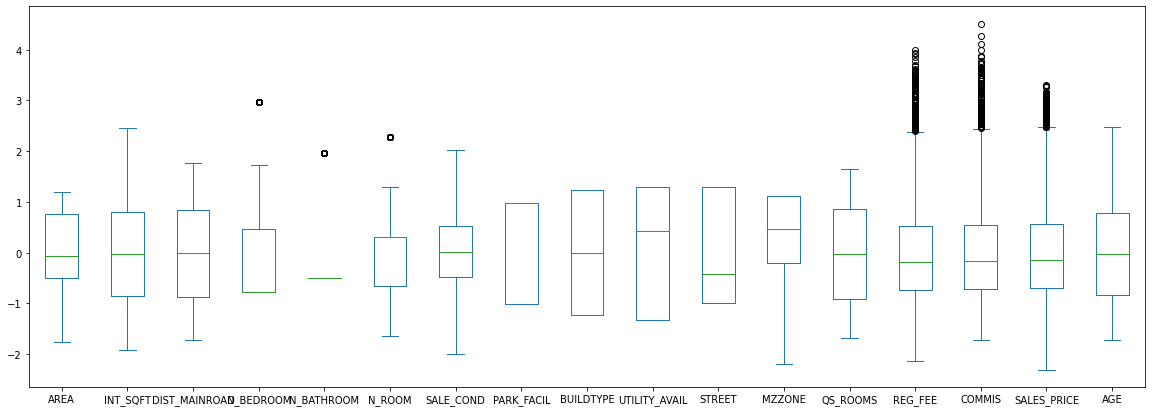

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
model = scaler.fit(x_train)
xtrain = pd.DataFrame(model.transform(x_train),columns=x_train.columns)
xtest = pd.DataFrame(model.transform(x_test),columns=x_test.columns)
xtrain.plot(kind='box',figsize=(20,7))

#ML model

In [34]:
#Random Forest

In [42]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100,max_depth=15)
reg.fit(xtrain,y_train)
y_pred = reg.predict(xtest)
print((y_test,y_pred))

In [43]:
print(r2_score(y_test,y_pred))

0.999815402709942


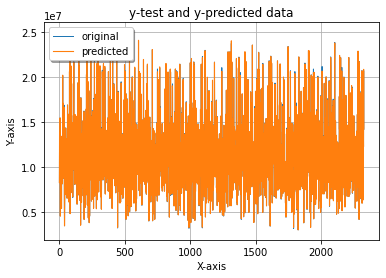

In [44]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [45]:
#Decision tree
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(xtrain,y_train)
y_pred = reg.predict(xtest)
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9995725722960956


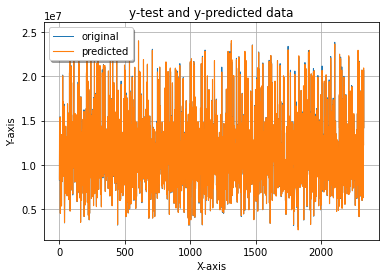

In [46]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_pred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 